In [32]:
import scripts as s
import numpy as np

import importlib

importlib.reload(s)

<module 'scripts' from '/Users/alfred/Documents/interpolation/scripts.py'>

In [23]:
interpolation_count = 22

# Hermite

In [ ]:
number_of_keyframes = 5

keyframes are: 
[[-7.5859508   5.79784094]
 [-0.89361832  6.16847179]
 [-5.44676829  9.04821875]
 [-8.04094947 -9.33765218]
 [ 2.99751986  8.19393223]]

gradients are: 
[[-18.96964901   4.54602907]
 [ -8.06684509   0.27526783]
 [ -8.85068807 -13.71676478]
 [  1.59796546   0.42594733]
 [-11.35780366 -18.7891967 ]]


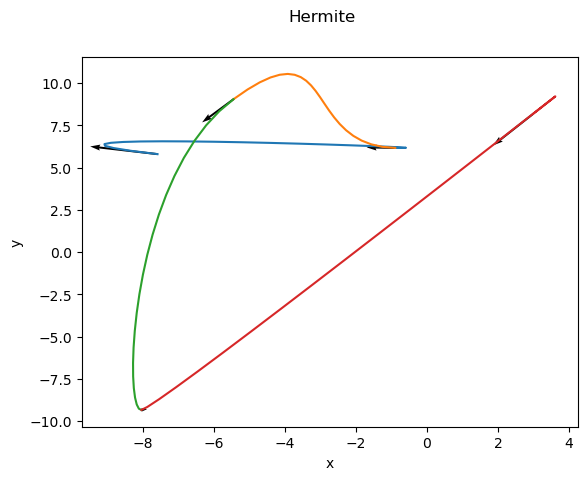

In [24]:
keyframes_x = 20 * np.random.random_sample(number_of_keyframes) - 10
keyframes_y = 20 * np.random.random_sample(number_of_keyframes) - 10
gradients_x = 40 * np.random.random_sample(number_of_keyframes) - 20
gradients_y = 40 * np.random.random_sample(number_of_keyframes) - 20

s.plot_interpolation_2d(keyframes_x, 
                        keyframes_y, 
                        gradients_x, 
                        gradients_y, 
                        s.hermite_interpolation_1d(keyframes_x, 
                                                   gradients_x, 
                                                   interpolation_count), 
                        s.hermite_interpolation_1d(keyframes_y, 
                                                   gradients_y, 
                                                   interpolation_count), 
                        "Hermite")

print("keyframes are: \n"
      f"{np.stack((keyframes_x, keyframes_y), axis=1)}\n"
      "\ngradients are: \n"
      f"{np.stack((gradients_x, gradients_y), axis=1)}")

# Catmull-Rom

In [29]:
number_of_keyframes = 7

keyframes are: 
[[-3.40650448  1.66670302]
 [ 2.10222687 -1.16427284]
 [-1.12093183  3.78346026]
 [-8.14381482 -7.25862729]
 [-4.57867701  6.89038579]
 [-2.73817716 -6.54500753]
 [ 3.77428936  7.69845227]]

gradients are: 
[[  2.28557265   2.11675723]
 [-10.24604169  -6.09435444]
 [ -3.45774518   3.10692554]
 [  5.40563766   0.71361976]
 [  8.35296637   0.80806648]]


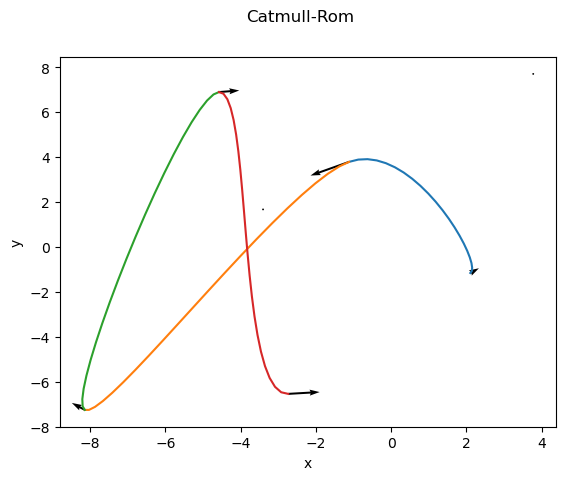

In [34]:
keyframes_x = 20 * np.random.random_sample(number_of_keyframes) - 10
keyframes_y = 20 * np.random.random_sample(number_of_keyframes) - 10

gradients_x = (np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[2:], 
                              np.zeros(shape=(1,)))) 
               - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[:-2], 
                              np.zeros(shape=(1,)))))

gradients_y = (np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[2:], 
                              np.zeros(shape=(1,)))) 
               - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[:-2], 
                              np.zeros(shape=(1,)))))

s.plot_interpolation_2d(keyframes_x, 
                        keyframes_y, 
                        gradients_x, 
                        gradients_y, 
                        s.catmullrom_spline_1d(keyframes_x, 
                                               interpolation_count), 
                        s.catmullrom_spline_1d(keyframes_y, 
                                               interpolation_count), 
                        "Catmull-Rom")

print("keyframes are: \n"
      f"{np.stack((keyframes_x, keyframes_y), axis=1)}\n"
      "\ngradients are: \n"
      f"{np.stack((gradients_x[1:-1], gradients_y[1:-1]), axis=1)}")